In [136]:
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
import pandas_datareader.data as web


### Apple Data (2020 - 2025)

##### Extracting Apple ticker Dataset from yfinance

In [137]:
start_date = '2020-01-01'
end_date = '2025-01-01'
#Apple stock data for last 5 years with adjusted close column
apple = yf.download("AAPL", start = start_date,end = end_date, auto_adjust = True)
# Calculating Daily returns
#New column reflecting how much the stock gained/lost each day
apple['Return'] = apple['Close'].pct_change()
# apple = apple.dropna()

print(apple.head())



[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume    Return
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL          
Date                                                                       
2020-01-02  72.538513  72.598892  71.292304  71.545890  135480400       NaN
2020-01-03  71.833282  72.594048  71.608677  71.765659  146322800 -0.009722
2020-01-06  72.405685  72.444328  70.703020  70.954195  118387200  0.007968
2020-01-07  72.065155  72.671348  71.845377  72.415345  108872000 -0.004703
2020-01-08  73.224388  73.526280  71.768064  71.768064  132079200  0.016086


In [138]:
#Converting apple dataset to monthly
apple_monthly = (1 + apple['Return']).resample('M').prod() - 1
apple_monthly.index = apple_monthly.index.strftime("%Y-%m")
apple_monthly = pd.DataFrame(apple_monthly)
apple_monthly.columns = ['Apple_Return']
apple_monthly.head()

C:\Users\karina mehta\AppData\Local\Temp\ipykernel_5364\3002596477.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



,Apple_Return
Date,
2020-01,0.030498
2020-02,-0.114701
2020-03,-0.069762
2020-04,0.155373
2020-05,0.085095


### Fama-French 3 Factor Model

##### Extracting Fama-French 3 Factor Dataset

In [139]:
#Pull data from Kenneth's Library using PandasDataReader
ff3 = web.DataReader('F-F_Research_Data_Factors','famafrench',start_date,end_date)
ff3

C:\Users\karina mehta\AppData\Local\Temp\ipykernel_5364\3127603995.py:2: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.

C:\Users\karina mehta\AppData\Local\Temp\ipykernel_5364\3127603995.py:2: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.



{0:          Mkt-RF   SMB    HML    RF
 Date                              
 2020-01   -0.11 -3.10  -6.22  0.13
 2020-02   -8.15  1.08  -3.82  0.12
 2020-03  -13.37 -4.69 -13.83  0.12
 2020-04   13.60  2.50  -1.34  0.00
 2020-05    5.57  2.40  -5.00  0.01
 ...         ...   ...    ...   ...
 2024-09    1.72 -0.13  -2.77  0.40
 2024-10   -1.00 -0.99   0.86  0.39
 2024-11    6.49  4.46   0.15  0.40
 2024-12   -3.17 -2.71  -3.00  0.37
 2025-01    2.80 -1.97   1.63  0.37
 
 [61 rows x 4 columns],
 1:       Mkt-RF    SMB    HML    RF
 Date                            
 2020   23.59  13.48 -46.94  0.44
 2021   23.87  -3.78  25.61  0.04
 2022  -21.32  -7.01  25.68  1.42
 2023   21.75  -3.54 -13.98  4.95
 2024   19.76 -11.34  -8.71  5.26,
 'DESCR': 'F-F Research Data Factors\n-------------------------\n\nThis file was created using the 202508 CRSP database. The 1-month TBill rate data until 202405 are from Ibbotson Associates. Starting from 202406, the 1-month TBill rate is from ICE BofA US 1-Mo

In [140]:
ff3_data = ff3[0]
ff3_data.index = ff3_data.index.to_timestamp().strftime('%Y-%m')
ff3_data

,Mkt-RF,SMB,HML,RF
Date,,,,
2020-01,-0.11,-3.10,-6.22,0.13
2020-02,-8.15,1.08,-3.82,0.12
2020-03,-13.37,-4.69,-13.83,0.12
2020-04,13.60,2.50,-1.34,0.00
2020-05,5.57,2.40,-5.00,0.01
...,...,...,...,...
2024-09,1.72,-0.13,-2.77,0.40
2024-10,-1.00,-0.99,0.86,0.39
2024-11,6.49,4.46,0.15,0.40


##### Merging the 2 datasets

In [141]:
apple_ff3 = apple_monthly.join(ff3_data)
apple_ff3.head()

,Apple_Return,Mkt-RF,SMB,HML,RF
Date,,,,,
2020-01,0.030498,-0.11,-3.10,-6.22,0.13
2020-02,-0.114701,-8.15,1.08,-3.82,0.12
2020-03,-0.069762,-13.37,-4.69,-13.83,0.12
2020-04,0.155373,13.60,2.50,-1.34,0.00
2020-05,0.085095,5.57,2.40,-5.00,0.01


In [142]:
apple_ff3[['Mkt-RF','SMB','HML','RF']] = apple_ff3[['Mkt-RF','SMB','HML','RF']]/100

apple_ff3['Excess_Return'] = apple_ff3['Apple_Return'] - apple_ff3['RF']

apple_ff3.head()

,Apple_Return,Mkt-RF,SMB,HML,RF,Excess_Return
Date,,,,,,
2020-01,0.030498,-0.0011,-0.0310,-0.0622,0.0013,0.029198
2020-02,-0.114701,-0.0815,0.0108,-0.0382,0.0012,-0.115901
2020-03,-0.069762,-0.1337,-0.0469,-0.1383,0.0012,-0.070962
2020-04,0.155373,0.1360,0.0250,-0.0134,0.0000,0.155373
2020-05,0.085095,0.0557,0.0240,-0.0500,0.0001,0.084995


##### Regression Analysis

In [143]:
X = apple_ff3[['Mkt-RF','SMB','HML']]
X = sm.add_constant(X)

y = apple_ff3['Excess_Return']

model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     35.32
Date:                Tue, 14 Oct 2025   Prob (F-statistic):           6.01e-13
Time:                        22:51:18   Log-Likelihood:                 96.112
No. Observations:                  60   AIC:                            -184.2
Df Residuals:                      56   BIC:                            -175.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0091      0.007      1.358      0.1

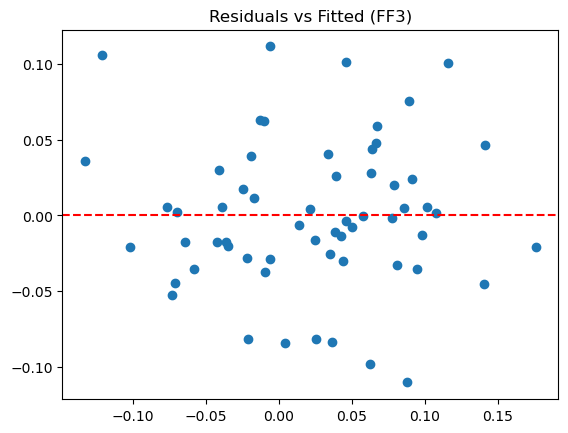

In [157]:
from matplotlib import pyplot as plt

plt.scatter(model.fittedvalues, model.resid)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted (FF3)')
plt.show()

C:\Users\karina mehta\AppData\Local\Temp\ipykernel_5364\1348353087.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



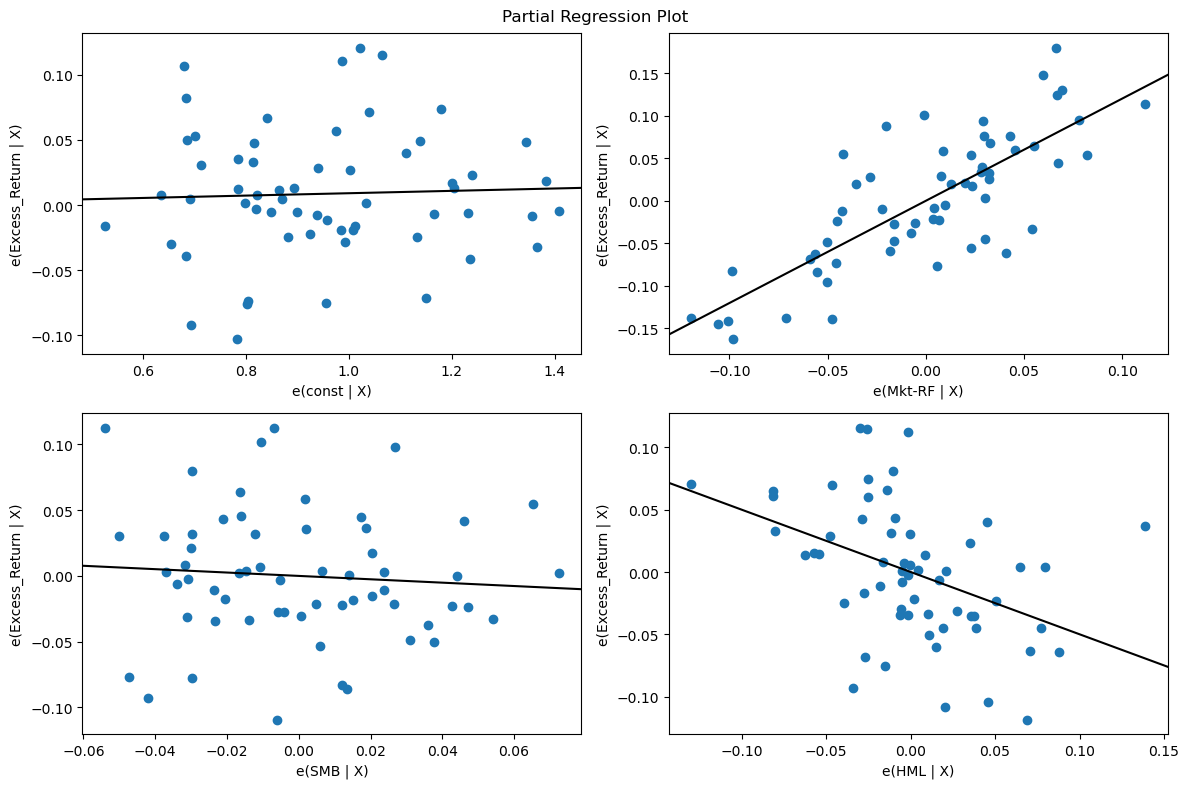

In [159]:
fig = sm.graphics.plot_partregress_grid(model, fig = plt.figure(figsize=(12,8)))
fig.show()

##### Train-Test Split

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [145]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

split_index = int(len(X)*0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

apple_ff3_model_split = LinearRegression()
apple_ff3_model_split.fit(X_train,y_train)

return_pred_ff3 = apple_ff3_model_split.predict(X_test)
return_pred_ff3


array([ 0.05004331,  0.09533137,  0.03446327, -0.03865094,  0.07202827,
        0.07493584, -0.02546515,  0.04927031,  0.04822891, -0.00298912,
        0.0791312 , -0.00505563])

In [146]:
mse_ff3 = mean_squared_error(y_test,return_pred_ff3)
rmse_ff3 = np.sqrt(mse)
r2_ff3 = r2_score(y_test,return_pred_ff3)

print('RMSE: ',rmse_ff3)
print('Coefficient of Determination:',r2_ff3)

RMSE:  0.06391862128974823
Coefficient of Determination: -0.3677502419742542


In [147]:
import plotly.express as px

dat = pd.DataFrame({'Actual':y_test,'Predicted':return_pred_ff3})
px.scatter(dat,x='Actual',y='Predicted',trendline = 'ols').show()


### Fama-French 5 Factor Model

##### Extracting Fama-French 5 Factor Dataset

In [148]:
# Fetch Fama-French 5-Factor data
ff5 = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench', start_date, end_date)
# Extract the first table
ff5_data = ff5[0]
ff5_data

C:\Users\karina mehta\AppData\Local\Temp\ipykernel_5364\115930953.py:2: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.

C:\Users\karina mehta\AppData\Local\Temp\ipykernel_5364\115930953.py:2: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.



,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2020-01,-0.09,-4.37,-6.22,-1.19,-2.19,0.13
2020-02,-8.15,0.08,-3.82,-1.43,-2.53,0.12
2020-03,-13.35,-8.18,-13.83,-1.61,1.19,0.12
2020-04,13.58,2.57,-1.34,2.76,-1.02,0.00
2020-05,5.59,1.92,-5.00,0.96,-3.16,0.01
...,...,...,...,...,...,...
2024-09,1.73,-0.92,-2.77,0.18,-0.29,0.40
2024-10,-1.00,-0.88,0.86,-1.42,0.98,0.39
2024-11,6.49,4.60,0.15,-2.30,-2.05,0.40


In [149]:
# ff5_data.index = pd.to_datetime(ff5_data.index).strftime('%Y-%m')
# ff5_data.head()

ff5_data.index = ff5_data.index.to_timestamp().strftime('%Y-%m')
ff5_data.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2020-01,-0.09,-4.37,-6.22,-1.19,-2.19,0.13
2020-02,-8.15,0.08,-3.82,-1.43,-2.53,0.12
2020-03,-13.35,-8.18,-13.83,-1.61,1.19,0.12
2020-04,13.58,2.57,-1.34,2.76,-1.02,0.00
2020-05,5.59,1.92,-5.00,0.96,-3.16,0.01


##### Merging Apple monthly returns with Fama-french factor 5

In [150]:
apple_ff5 = apple_monthly.join(ff5_data)
apple_ff5.head()

,Apple_Return,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,,
2020-01,0.030498,-0.09,-4.37,-6.22,-1.19,-2.19,0.13
2020-02,-0.114701,-8.15,0.08,-3.82,-1.43,-2.53,0.12
2020-03,-0.069762,-13.35,-8.18,-13.83,-1.61,1.19,0.12
2020-04,0.155373,13.58,2.57,-1.34,2.76,-1.02,0.00
2020-05,0.085095,5.59,1.92,-5.00,0.96,-3.16,0.01


In [151]:
apple_ff5[['Mkt-RF','SMB','HML','RMW','CMA','RF']] = apple_ff5[['Mkt-RF','SMB','HML','RMW','CMA','RF']]/100

apple_ff5['Excess_Return'] = apple_ff5['Apple_Return'] - apple_ff5['RF']
apple_ff5.head()

,Apple_Return,Mkt-RF,SMB,HML,RMW,CMA,RF,Excess_Return
Date,,,,,,,,
2020-01,0.030498,-0.0009,-0.0437,-0.0622,-0.0119,-0.0219,0.0013,0.029198
2020-02,-0.114701,-0.0815,0.0008,-0.0382,-0.0143,-0.0253,0.0012,-0.115901
2020-03,-0.069762,-0.1335,-0.0818,-0.1383,-0.0161,0.0119,0.0012,-0.070962
2020-04,0.155373,0.1358,0.0257,-0.0134,0.0276,-0.0102,0.0000,0.155373
2020-05,0.085095,0.0559,0.0192,-0.0500,0.0096,-0.0316,0.0001,0.084995


##### Regression Analysis

In [152]:
X = apple_ff5[['Mkt-RF','SMB','HML','RMW','CMA']]
y = apple_ff5['Excess_Return']
model_ff5 = sm.OLS(y,X).fit()
print(model_ff5.summary())

                                 OLS Regression Results                                
Dep. Variable:          Excess_Return   R-squared (uncentered):                   0.709
Model:                            OLS   Adj. R-squared (uncentered):              0.683
Method:                 Least Squares   F-statistic:                              26.83
Date:                Tue, 14 Oct 2025   Prob (F-statistic):                    1.26e-13
Time:                        22:51:19   Log-Likelihood:                          99.231
No. Observations:                  60   AIC:                                     -188.5
Df Residuals:                      55   BIC:                                     -178.0
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

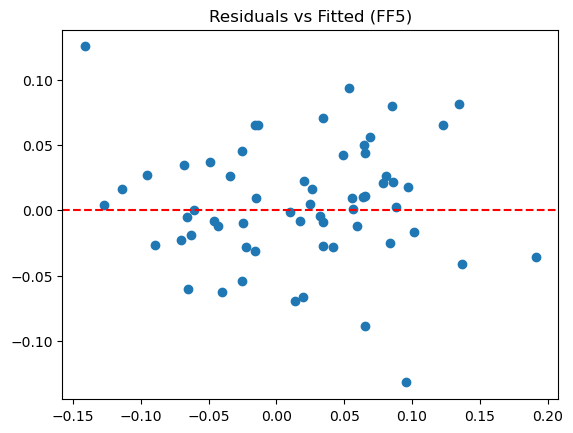

In [161]:
from matplotlib import pyplot as plt

plt.scatter(model_ff5.fittedvalues, model_ff5.resid)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted (FF5)')
plt.show()

C:\Users\karina mehta\AppData\Local\Temp\ipykernel_5364\2298680061.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



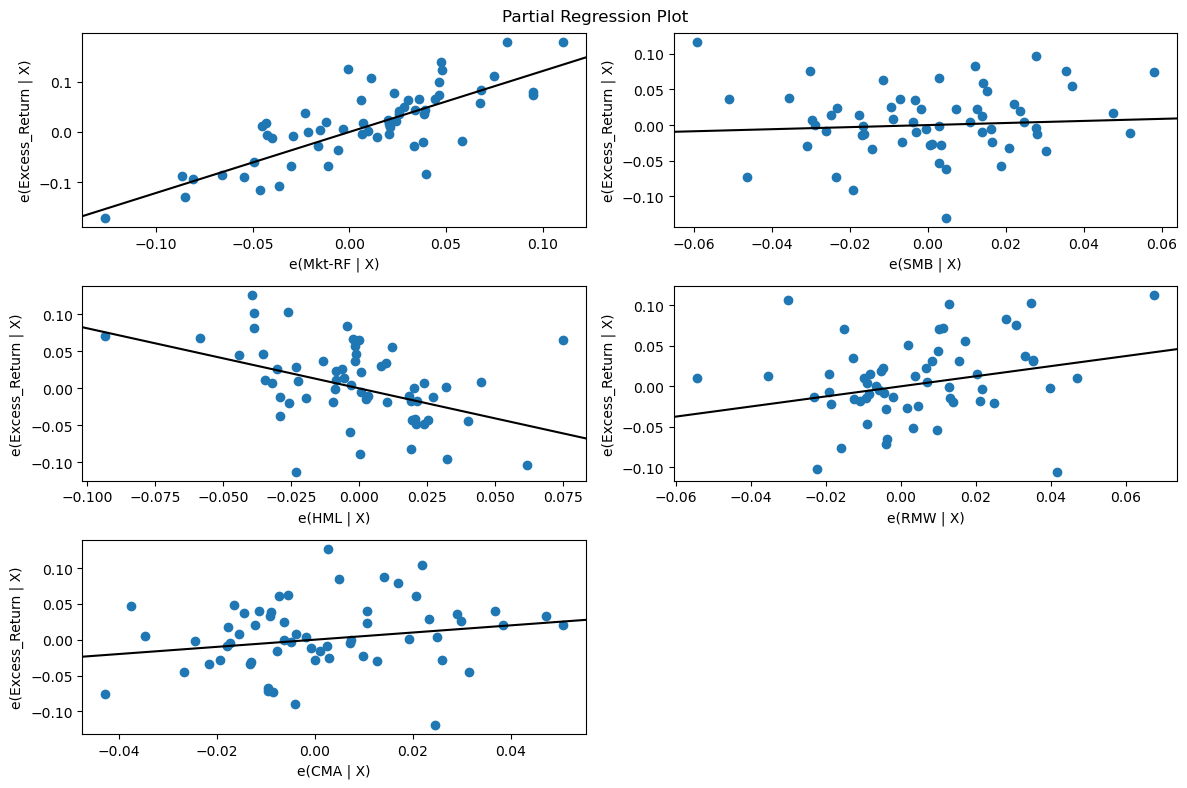

In [160]:
fig = sm.graphics.plot_partregress_grid(model_ff5, fig = plt.figure(figsize=(12,8)))
fig.show()

##### Train-Test Split

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
apple_ff5_model_split = LinearRegression()
apple_ff5_model_split.fit(X_train,y_train)

return_pred_ff5 = apple_ff5_model_split.predict(X_test)

In [154]:
mse_ff5 = mean_squared_error(y_test,return_pred)
rmse_ff5 = np.sqrt(mse)
r2_ff5 = r2_score(y_test,return_pred)

print('RMSE: ',rmse_ff5)
print('Coefficient of Determination:',r2_ff5)

RMSE:  0.06391862128974823
Coefficient of Determination: -0.09613697164593793


In [155]:
import plotly.express as px

dat = pd.DataFrame({'Actual':y_test,'Predicted':return_pred_ff5})
px.scatter(dat,x='Actual',y='Predicted',trendline = 'ols').show()

##### Metrics

##### Visualisations

## Fama-French 5 V/S Fama-French 3 Factor Model

In [156]:
print(f"FF3 R²: {r2_ff3:.4f}, RMSE: {rmse_ff3:.6f}")
print(f"FF5 R²: {r2_ff5:.4f}, RMSE: {rmse_ff5:.6f}")

FF3 R²: -0.3678, RMSE: 0.063919
FF5 R²: -0.0961, RMSE: 0.063919
